In [ ]:
import pandas as pd 


In [2]:
data = pd.read_csv("OnlineRetail.csv",encoding ='latin1')

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Shape of the data 

In [5]:
data.shape

(541909, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [8]:
data.isnull().sum()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
round(100*(data.isnull().sum())/len(data),2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [10]:
data.dropna()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [11]:
data.shape

(541909, 8)

In [12]:
#data.drop(columns=[StockCode], inplace=True)

In [13]:
data['CustomerID'] = data['CustomerID'].astype(str)


Data preparation
Analyse
#Based on Recency
#Frequency
#Monetary

In [14]:
data['Amount'] = data['Quantity']*data['UnitPrice']
rfm_m  = data.groupby('CustomerID')['Amount'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()



,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [15]:
#by monetary
rfm_m = rfm_m.reset_index()
print(rfm_m)


      index CustomerID      Amount
0         0    12346.0        0.00
1         1    12347.0     4310.00
2         2    12348.0     1797.24
3         3    12349.0     1757.55
4         4    12350.0      334.40
...     ...        ...         ...
4368   4368    18281.0       80.82
4369   4369    18282.0      176.60
4370   4370    18283.0     2094.88
4371   4371    18287.0     1837.28
4372   4372        nan  1447682.12

[4373 rows x 3 columns]


In [16]:
# Group by ProductID and sum the quantities sold
product_sales = data.groupby('Description')['Quantity'].sum()

most_sold_product = product_sales.idxmax()
print("Product with the maximum sales:", most_sold_product)

# Filter rows in the original DataFrame for the most sold product
most_sold_product_data = data[data['Description'] == most_sold_product]

# Display the first few rows of this subset
most_sold_product_data.head()


Product with the maximum sales: WORLD WAR 2 GLIDERS ASSTD DESIGNS


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
3259,536615,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,12/2/2010 10:09,0.29,14047.0,United Kingdom,13.92
3297,536618,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,12/2/2010 10:17,0.29,17017.0,United Kingdom,13.92
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,12/2/2010 17:38,0.18,16754.0,United Kingdom,518.40
5047,536839,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,288,12/2/2010 18:25,0.21,15093.0,United Kingdom,60.48
5278,536856,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,12/3/2010 10:26,0.29,13370.0,United Kingdom,13.92


In [17]:
# Grouping by Description and calculating the total quantity sold for each product
frequently_sold_products = data.groupby('Description')['InvoiceNo'].count().sort_values(ascending=False)

# Display the top 10 most frequently sold products
print(frequently_sold_products.head(10))

Description
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
ASSORTED COLOUR BIRD ORNAMENT         1501
SET OF 3 CAKE TINS PANTRY DESIGN      1473
PACK OF 72 RETROSPOT CAKE CASES       1385
LUNCH BAG  BLACK SKULL.               1350
NATURAL SLATE HEART CHALKBOARD        1280
Name: InvoiceNo, dtype: int64


In [18]:

# Convert 'InvoiceDate' column to datetime using the correct format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%m/%d/%Y %H:%M')

# Continue with your calculations
last_date = data['InvoiceDate'].max()
month_start_day = last_date - pd.Timedelta(days=30)

# Filter data for the last 30 days
last_month_data = data[data['InvoiceDate'] >= month_start_day]

# Create 'Amount' column
last_month_data['Amount'] = last_month_data['Quantity'] * last_month_data['UnitPrice']

# Group by 'CustomerID' (or another column) and sum the 'Amount' column
grouped_last_month_data = last_month_data.groupby('CustomerID')['Amount'].sum().reset_index()

# Print the grouped data
print(f"Total sales amount recorded in the last 30 days grouped by CustomerID:\n{grouped_last_month_data}")

Total sales amount recorded in the last 30 days grouped by CustomerID:
     CustomerID        Amount
0       12347.0  2.248200e+02
1       12349.0  1.757550e+03
2       12356.0  5.835000e+01
3       12358.0  6.832000e+02
4       12359.0 -9.125000e+01
...         ...           ...
1691    18274.0  1.776357e-15
1692    18276.0 -1.250000e+01
1693    18282.0  7.784000e+01
1694    18283.0  8.595600e+02
1695        nan  3.412653e+05

[1696 rows x 2 columns]


C:\Users\User\AppData\Local\Temp\ipykernel_10752\3062228840.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_month_data['Amount'] = last_month_data['Quantity'] * last_month_data['UnitPrice']


In [19]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
last_date = data['InvoiceDate'].max()
last_month = last_date.month
last_month_year = last_date.year
last_month_data = data[(data['InvoiceDate'].dt.month == last_month) & 
                       (data['InvoiceDate'].dt.year == last_month_year)]
total_sales_last_month = last_month_data['Quantity'].sum()

print(f"The total amount of sales recorded in the last month ({last_month_year}-{last_month}) is: {total_sales_last_month}")

The total amount of sales recorded in the last month (2011-12) is: 226333


In [20]:

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'],format ='%d-%m-%Y %H:%M')
last_date = data['InvoiceDate'].max()
month_start_day= last_date - pd.Timedelta(days=30)
print(month_start_day)

# Filter data for the last 30 days
last_month_data = data[data['InvoiceDate'] >= month_start_day]

# Calculate the total sales amount for the last 30 days
total_sales_last_month = last_month_data['Quantity'].sum()

print(f"The total amount of sales recorded in the last 30 days is: {total_sales_last_month}")

2011-11-09 12:50:00
The total amount of sales recorded in the last 30 days is: 759554


In [21]:
#find maximum date
max_date=max(data["InvoiceDate"])
print("max date is",max_date)
min_date = min(data["InvoiceDate"])
print("min date is",min_date)
#DIFFERENCE BETWEEN MAX DATE AND MIN DATE
data["diff"]=max_date-min_date
print(data["diff"])


max date is 2011-12-09 12:50:00
min date is 2010-12-01 08:26:00
0        373 days 04:24:00
1        373 days 04:24:00
2        373 days 04:24:00
3        373 days 04:24:00
4        373 days 04:24:00
                ...       
541904   373 days 04:24:00
541905   373 days 04:24:00
541906   373 days 04:24:00
541907   373 days 04:24:00
541908   373 days 04:24:00
Name: diff, Length: 541909, dtype: timedelta64[ns]


In [22]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\User\AppData\Local\Temp\ipykernel_10752\3278129614.py:1: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=data, scale='width', inner='quartile')


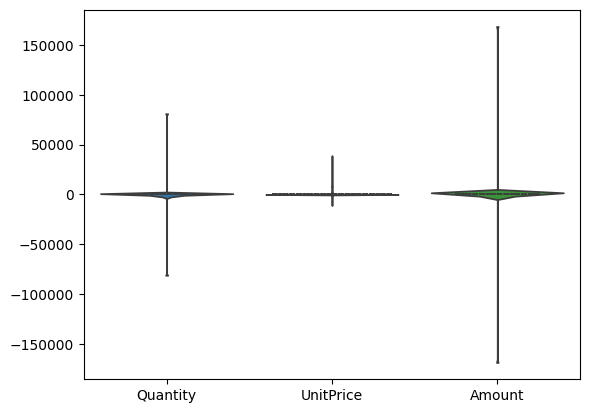

In [23]:

sns.violinplot(data=data, scale='width', inner='quartile')
plt.show()

In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(data[['Quantity','UnitPrice']],data[['Description']],test_size=0.3,random_state=0)

In [28]:
from sklearn import preprocessing
x_train_norm = preprocessing.normalize(x_train)
x_test_norm = preprocessing.normalize(x_test)


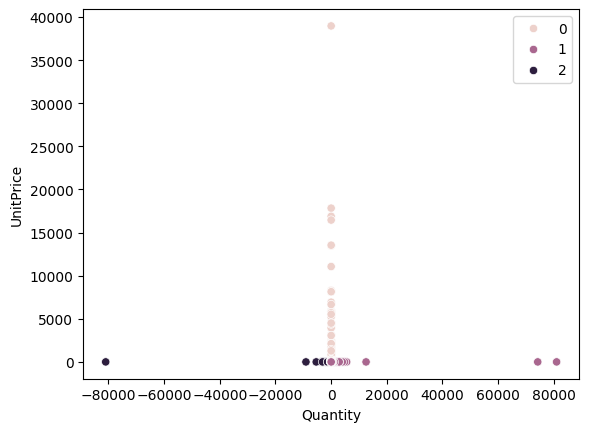

In [ ]:
from sklearn.metrics import silhouette_score
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0, n_init='auto')
kmeans.fit(x_train_norm)

# Visualize the clusters
sns.scatterplot(data=x_train, x='Quantity', y='UnitPrice', hue=kmeans.labels_)
plt.show()

# Calculate silhouette score
perf = silhouette_score(x_train_norm, kmeans.labels_, metric='euclidean')
print(perf)


In [ ]:
K=range(2,8)
fit=[]
score=[]





In [ ]:
for k in K:
    '''Train the model for the current value of k on the training model'''
    model=KMeans(n_clusters=k,random_state=0,n_init='auto').fit(x_train_norm)
    fit.append(model)
    score.append(silhouette_score(x_train_norm,model.labels_,metric='euclidean'))



In [ ]:
#print(fit)
#print(score)
'''Visualize the models for k=2,k=4,k=7,k=5'''
sns.scatterplot(data=x_train,x='Quantity',y='UnitPrice',hue=fit[0].labels_)
plt.show()


In [ ]:
sns.scatterplot(data=x_train,x='Quantity',y='UnitPrice',hue=fit[2].labels_)
plt.show()


In [ ]:

sns.scatterplot(data=x_train,x='Quantity',y='UnitPrice',hue=fit[10].labels_)
plt.show()


In [ ]:

sns.scatterplot(data=x_train,x='Quantity',y='UnitPrice',hue=fit[0].labels_)
plt.show()


In [ ]:
sns.lineplot(x=K,y=score)
plt.show()


In [ ]:
sns.scatterplot(data=x_train,x='UnitPrice',y='Quantity',hue=fit[3].labels_)
plt.show()


In [ ]:
sns.boxplot(x=fit[3].labels_, y=y_train['Description'])
plt.show()